# 12.降维参考代码

## 1.特征值和特征向量的求解

In [1]:
import numpy as np
A = np.array([[-1,1,0],[-4,3,0],[1,0,2]])
#A = np.array([[0,1],[1,1],[1,0]])
print('打印A：\n{}'.format(A))

打印A：
[[-1  1  0]
 [-4  3  0]
 [ 1  0  2]]


In [2]:
a, b = np.linalg.eig(A)
print('打印特征值a：\n{}'.format(a))
print('打印特征向量b：\n{}'.format(b))

打印特征值a：
[2. 1. 1.]
打印特征向量b：
[[ 0.          0.40824829  0.40824829]
 [ 0.          0.81649658  0.81649658]
 [ 1.         -0.40824829 -0.40824829]]


## 2.奇异值分解(SVD)

In [3]:
import numpy as np
D = np.array([[0,1],[1,1],[1,0]])
print('D：\n{}'.format(D))

D：
[[0 1]
 [1 1]
 [1 0]]


D不可逆，则np.linalg.eig(D) 会报错，下面采取SVD分解

In [4]:
u, sigma, v = np.linalg.svd(D)
print("u:", u )      #  分解出的u矩阵
print("sigma:", sigma )      #   分解出的奇异值向量
print("v:", v)       #  分解出的v矩阵

u: [[-4.08248290e-01  7.07106781e-01  5.77350269e-01]
 [-8.16496581e-01  2.64811510e-17 -5.77350269e-01]
 [-4.08248290e-01 -7.07106781e-01  5.77350269e-01]]
sigma: [1.73205081 1.        ]
v: [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


## 3.利用奇异值分解（SVD）压缩图片

In [5]:
import os
os.chdir('/Users/lizhang/Documents/mac电脑/1_我的课程/机器学习/12.数据降维/12_降维代码/')

In [6]:
import numpy as np
import os
from PIL import Image

In [7]:
A = Image.open("哆啦A梦.png", 'r')
a = np.array(A)
print('a=',a)
print('type(a) = ', type(a))
print('原始图片大小：', a.shape)

a= [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[215 242 247]
  [215 242 247]
  [215 242 247]
  ...
  [195 247 249]
  [255 255 255]
  [255 255 255]]

 [[215 242 247]
  [215 242 247]
  [215 242 247]
  ...
  [195 247 249]
  [255 255 255]
  [255 255 255]]

 ...

 [[128 208   5]
  [131 210  21]
  [133 210  34]
  ...
  [193 213  91]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
type(a) =  <class 'numpy.ndarray'>
原始图片大小： (513, 322, 3)


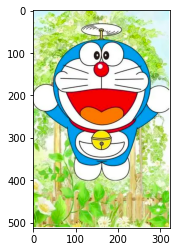

In [8]:
from matplotlib import pyplot as plt
plt.imshow(a)
plt.show()

In [9]:
# 图片有RGB三原色组成，所以有三个矩阵
u_r, sigma_r, v_r = np.linalg.svd(a[:, :, 0])    # 奇异值分解
u_g, sigma_g, v_g = np.linalg.svd(a[:, :, 1])
u_b, sigma_b, v_b = np.linalg.svd(a[:, :, 2])

In [10]:
def restore(sigma, u, v, K):  # 奇异值、左特征向量、右特征向量
    m = len(u)
    n = len(v[0])
    a = np.zeros((m, n))
    for k in range(K):
        uk = u[:, k].reshape(m, 1)
        vk = v[k].reshape(1, n)
        a += sigma[k] * np.dot(uk, vk)   # 前 k 个奇异值的加和
    a = a.clip(0, 255)
    return np.rint(a).astype('uint8')#必须要将生成的数组的格式转换为uint8格式，否则应用imshow时图像不能显示！

In [11]:
# 使用前1个，2个，...，50个奇异值的结果
K = 50 
for k in range(1, K+1):
    R = restore(sigma_r, u_r, v_r, k)
    G = restore(sigma_g, u_g, v_g, k)
    B = restore(sigma_b, u_b, v_b, k)
    I = np.stack((R, G, B), axis=2)   # 将矩阵叠合在一起，生成图像
    Image.fromarray(I).save('svd_%d.jpg' % (k))

## 4.主成分分析（PCA）

In [12]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [13]:
print(pca.explained_variance_ratio_) #方差占比

[0.99244289 0.00755711]


In [14]:
print(pca.singular_values_) #奇异值

[6.30061232 0.54980396]


## 主成分分析案例

In [15]:
import pandas as pd
data=pd.read_excel("学生成绩数据.xlsx")
data.head()

,ID,数学,物理,化学,语文,历史,英语
0,1,65,61,72,84,81,79
1,2,77,77,76,64,70,55
2,3,67,63,49,65,67,57
3,4,78,84,75,62,71,64
4,5,66,71,67,52,65,57


In [16]:
data=data.drop(columns="ID")

In [17]:
data.head()

,数学,物理,化学,语文,历史,英语
0,65,61,72,84,81,79
1,77,77,76,64,70,55
2,67,63,49,65,67,57
3,78,84,75,62,71,64
4,66,71,67,52,65,57


In [21]:
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()
data = scaler.fit_transform(data)
data

array([[-0.96510868, -1.07850684, -0.20156288,  1.0345638 ,  0.47437707,
         0.68230456],
       [ 0.19749328,  0.09907543,  0.0895835 , -0.54538679, -0.70537808,
        -1.59447642],
       [-0.77134168, -0.93130905, -1.87565461, -0.46638926, -1.02712949,
        -1.40474467],
       [ 0.29437678,  0.61426767,  0.01679691, -0.70338185, -0.59812761,
        -0.74068355],
       [-0.86822518, -0.34251792, -0.56549587, -1.49335714, -1.24163042,
        -1.40474467],
       [ 0.77879426,  1.79184994,  0.30794329, -2.36232997, -1.02712949,
        -2.06880579],
       [ 1.06944475,  1.35025659,  1.61810204, -1.57235467, -1.45613136,
        -1.59447642],
       [-0.77134168,  0.61426767, -1.58450822, -1.01937197, -1.13437995,
        -1.49961055],
       [-0.57757469, -1.4465013 , -0.56549587,  0.32358603,  1.86863316,
         0.77717043],
       [ 0.19749328,  1.05586103,  0.38072989, -0.22939667, -1.13437995,
        -1.12014705],
       [ 0.87567776, -0.63691349,  0.01679691, -0.

In [22]:
model = PCA( n_components=0.70)
model.fit(data)

PCA(n_components=0.7)

- n_components：这个参数可以帮我们指定希望PCA降维后的特征维度数目。最常用的做法是直接指定降维到的维度数目，此时n_components是一个大于等于1的整数。当然，我们也可以指定主成分的方差和所占的最小比例阈值，让PCA类自己去根据样本特征方差来决定降维到的维度数，此时n_components是一个（0，1]之间的数。当然，我们还可以将参数设置为"mle", 此时PCA类会用MLE算法根据特征的方差分布情况自己去选择一定数量的主成分特征来降维。我们也可以用默认值，即不输入n_components，此时n_components=min(样本数，特征数)。

- whiten ：判断是否进行白化。所谓白化，就是对降维后的数据的每个特征进行归一化，让方差都为1.对于PCA降维本身来说，一般不需要白化。如果你PCA降维后有后续的数据处理动作，可以考虑白化。默认值是False，即不进行白化。

- svd_solver：即指定奇异值分解SVD的方法，由于特征分解是奇异值分解SVD的一个特例，一般的PCA库都是基于SVD实现的。有4个可以选择的值：{‘auto’, ‘full’, ‘arpack’, ‘randomized’}。randomized一般适用于数据量大，数据维度多同时主成分数目比例又较低的PCA降维，它使用了一些加快SVD的随机算法。 full则是传统意义上的SVD，使用了scipy库对应的实现。arpack和randomized的适用场景类似，区别是randomized使用的是scikit-learn自己的SVD实现，而arpack直接使用了scipy库的sparse SVD实现。默认是auto，即PCA类会自己去在前面讲到的三种算法里面去权衡，选择一个合适的SVD算法来降维。一般来说，使用默认值就够了。

- 除了这些输入参数外，有两个PCA类的成员值得关注。第一个是$explained_variance_$，它代表降维后的各主成分的方差值。方差值越大，则说明越是重要的主成分。第二个是$explained_variance_ratio_$，它代表降维后的各主成分的方差值占总方差值的比例，这个比例越大，则越是重要的主成分。

In [23]:
print('奇异值:',model.singular_values_) #奇异值

奇异值: [13.88938543  8.10240851]


In [24]:
print('方差占比:',model.explained_variance_ratio_) #方差占比

方差占比: [0.6183174  0.21041354]


In [25]:
print('特征向量:',model.components_)

特征向量: [[-0.41205198 -0.38117795 -0.33213465  0.46118457  0.4205876   0.43013716]
 [-0.37597731 -0.356706   -0.5626165  -0.27852313 -0.41478358 -0.40650217]]


In [26]:
pc = model.fit_transform(data)    # 训练并降维
pc

array([[ 1.8458505 ,  0.09869937],
       [-1.38293746,  0.93264526],
       [ 0.0444749 ,  2.80445313],
       [-1.25557209,  0.40584893],
       [-1.13902555,  2.26874265],
       [-3.51753434,  0.81974747],
       [-3.51620268, -0.10402783],
       [-0.98230531,  2.32640027],
       [ 2.24663266, -0.12983805],
       [-1.67501924,  0.3246668 ],
       [-1.17695408,  0.76065098],
       [ 1.15656395, -0.21478424],
       [-1.94424108, -0.78320441],
       [ 0.13026004, -0.90867535],
       [-0.08940481,  1.27591036],
       [-1.62140217, -0.05220103],
       [-0.65077543, -0.54509667],
       [ 1.70890651, -1.0121499 ],
       [ 2.81890001, -0.87577409],
       [ 0.04479664, -1.50659205],
       [ 1.7476378 , -1.18458088],
       [-1.87131409, -1.17348168],
       [-1.89649934, -1.48958061],
       [-0.45935156, -0.12565877],
       [-2.73741142, -0.57906315],
       [-0.84129968, -2.11740575],
       [ 0.70743714,  0.66945216],
       [ 1.95932966,  1.59387782],
       [ 0.97691254,

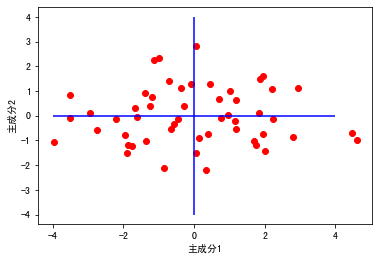

In [29]:
plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签 
plt.rcParams['axes.unicode_minus']=False

plt.scatter(pc[:,0],pc[:,1],color='r')
plt.hlines(y=0,xmax=4,xmin=-4,color='b')
plt.vlines(x=0,ymax=4,ymin=-4,color='b')
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.show()